In [1]:
import warnings
warnings.filterwarnings("ignore")
import netCDF4 as nc
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr    
import glob
import os
import cartopy.crs as ccrs
import matplotlib.colors as colors
import pandas as pd
import datetime
from matplotlib import colors
import pymannkendall as mk
from matplotlib.ticker import MaxNLocator

In [2]:
land_sea = xr.open_dataset("/g/data/w97/sl7808/landmask_accessESM1-5_AUS.nc").sftlf


def plot_spec(ax,nn):
    #ax[nn].set_xticks([ 120, 130, 140, 150], crs=ccrs.PlateCarree())
    #ax[nn].set_yticks([-40, -30, -20, -10], crs=ccrs.PlateCarree())
    ax[nn].coastlines()
    ax[nn].set_ylabel('')
    ax[nn].set_xlabel('')
    ax[nn].axis('on')

#define mk test for np_apply_along_axis 
def mk_miss_trend(data):
    mask=~np.isnan(data)
    if (mask.any() == False):
        return np.nan
    else:
        mkk = mk.original_test(data[mask])
        if mkk.trend == 'increasing':
          xx=1
        elif mkk.trend == 'decreasing':
          xx=-1
        else:
          xx=0
        return xx

def mk_miss_h(data):
    '''data and tos should both be 1D arrays'''
    # select the non-NAN:
    mask=~np.isnan(data)
    if (mask.any() == False):
        return np.nan
    else:
        mkk = mk.original_test(data[mask])
        return mkk.h

def mk_miss_p(data):
    '''data and tos should both be 1D arrays'''
    # select the non-NAN:
    mask=~np.isnan(data)
    if (mask.any() == False):
        return np.nan
    else:
        mkk = mk.original_test(data[mask])
        return mkk.p

def mk_miss_z(data):
    '''data and tos should both be 1D arrays'''
    # select the non-NAN:
    mask=~np.isnan(data)
    if (mask.any() == False):
        return np.nan
    else:
        mkk = mk.original_test(data[mask])
        return mkk.z

def mk_miss_tau(data):
    '''data and tos should both be 1D arrays'''
    # select the non-NAN:
    mask=~np.isnan(data)
    if (mask.any() == False):
        return np.nan
    else:
        mkk = mk.original_test(data[mask])
        return mkk.Tau

def mk_miss_s(data):
    '''data and tos should both be 1D arrays'''
    # select the non-NAN:
    mask=~np.isnan(data)
    if (mask.any() == False):
        return np.nan
    else:
        mkk = mk.original_test(data[mask])
        return mkk.s


def mk_miss_vars(data):
    '''data and tos should both be 1D arrays'''
    # select the non-NAN:
    mask=~np.isnan(data)
    if (mask.any() == False):
        return np.nan
    else:
        mkk = mk.original_test(data[mask])
        return mkk.var_s

    

def mk_miss_slope(data):
    '''data and tos should both be 1D arrays'''
    # select the non-NAN:
    mask=~np.isnan(data)
    if (mask.any() == False):
        return np.nan
    else:
        mkk = mk.original_test(data[mask])
        return (mkk.slope)*10


def mk_miss_intercept(data):
    '''data and tos should both be 1D arrays'''
    # select the non-NAN:
    mask=~np.isnan(data)
    if (mask.any() == False):
        return np.nan
    else:
        mkk = mk.original_test(data[mask])
        return mkk.intercept

# define mktest - plot mktest values for obs and access 

In [63]:
def mktest(HWX_EHF,mk_miss_xxx,title,xxx,nnn):
    
    
    from string import ascii_lowercase

    cmap2 = plt.cm.get_cmap("RdYlBu_r", 16)
    d = ("/g/data/w97/sl7808/ALLOUTPUT/EHF_year_ACCESS/by_HWX/"+HWX_EHF+".nc") 
    d1=xr.open_dataset(d, decode_times=False)
    ACCESS=d1[HWX_EHF].isel(time=slice(60,163))



    #HWX_obs = xr.open_dataset("/g/data/w97/sl7808/ehf_AGCD/EHF_heatwaves____yearly_summer.nc",decode_times=False)
    HWX_obs = xr.open_dataset("/g/data/w97/sl7808/ALLOUTPUT/EHF_obs/new/"+HWX_EHF+".nc",decode_times=False)
    
    
    obs=HWX_obs[HWX_EHF]  
    HWX_o=obs.where(obs>0).isel(time=slice(0,103)).where(land_sea>60)

    #Plot
    fig, axs = plt.subplots( figsize=(15,10),dpi=900)#, sharex=True, sharey=True, squeeze=True)
    
    

    ax={}
    for i in range(25):
        ax[i] = plt.subplot(5,5,i+1,projection=ccrs.PlateCarree())
        ax[i].axis('off')
        

    #observation
    mk_t=np.apply_along_axis(mk_miss_trend,0,HWX_o[...])
    #HWX_1=HWX_o.where(mk_t!=0)
    mk_h=np.apply_along_axis(mk_miss_xxx,0,HWX_o[...])
    mkval=xr.DataArray(mk_h,dims=["lat","lon"],coords={"lat":HWX_o.lat,"lon":HWX_o.lon})
    mkval.plot(ax=ax[0],cmap=cmap2,vmax=xxx,vmin=nnn, add_colorbar=False,xlim=[110,155],ylim=[-45,-10])
    
    mkval_2=xr.DataArray(mk_t,dims=["lat","lon"],coords={"lat":HWX_o.lat,"lon":HWX_o.lon})
    mkval_2.plot.contourf(ax=ax[0],levels=[-1,-0.5,0.5,1],colors='none',hatches=['xx', '', '..'], add_colorbar=False,xlim=[110,155],ylim=[-45,-10])

    #obs plot
    plot_spec(ax,0)
    ax[0].set_title('Oberservation') 
    ax[0].axis('on')
    ax[0].text(0.02,0.80,'(%s)' %(ascii_lowercase[0]),horizontalalignment='left',verticalalignment='bottom',transform = ax[0].transAxes,fontweight='bold', fontsize=12)



    
    #ACCESS
    for i in range(20):
        HWX_A=ACCESS.isel(ensemble=i).where(land_sea>60)
        mk_t=np.apply_along_axis(mk_miss_trend,0,HWX_A[...])
        #HWX_1=HWX_o.where(mk_t!=0)
        mk_h=np.apply_along_axis(mk_miss_xxx,0,HWX_A[...])
        
        mkval=xr.DataArray(mk_h,dims=["lat","lon"],coords={"lat":HWX_A.lat,"lon":HWX_A.lon})
        p=mkval.plot(ax=ax[i+5],cmap=cmap2,vmax=xxx,vmin=nnn, add_colorbar=False,xlim=[110,155],ylim=[-45,-10])
        
        mkval_2=xr.DataArray(mk_t,dims=["lat","lon"],coords={"lat":HWX_A.lat,"lon":HWX_A.lon})
        pp=mkval_2.plot.contourf(ax=ax[i+5],levels=[-1,-0.5,0.5,1],colors='none',hatches=['xx', '', '..'], add_colorbar=False,xlim=[110,155],ylim=[-45,-10])
        plot_spec(ax,i+5)
        ax[i+5].axis('on')
        aaa=i+2
        ax[i+5].text(0.02,0.80,'(%s)' %(ascii_lowercase[aaa]),horizontalalignment='left',verticalalignment='bottom',transform = ax[i+5].transAxes,fontweight='bold', fontsize=12)


    
    
    #ACCESS ensemble mean
    mkval_a=[]
    mkval_t_a=[]
    for i in range(20):
        HWX_A=ACCESS.isel(ensemble=i).where(land_sea>60)
       
        mk_h=np.apply_along_axis(mk_miss_slope,0,HWX_A[...])
        mkval=xr.DataArray(mk_h,dims=["lat","lon"],coords={"lat":HWX_A.lat,"lon":HWX_A.lon})
        mkval_a.insert(-1,mkval)
        
        #trend 
        mk_t=np.apply_along_axis(mk_miss_trend,0,HWX_A[...])
        mkval_t=xr.DataArray(mk_t,dims=["lat","lon"],coords={"lat":HWX_A.lat,"lon":HWX_A.lon})
        mkval_t_a.insert(-1,mkval_t)
        
    mkval_aa=xr.concat(mkval_a, 'ensemble')
    mkval_t_aa=xr.concat(mkval_t_a, 'ensemble')
        
    p=mkval_aa.mean(dim='ensemble').plot(ax=ax[1],cmap=cmap2,vmax=xxx,vmin=nnn, add_colorbar=False,xlim=[110,155],ylim=[-45,-10])
    
    ax[1].coastlines()
    ax[1].axis('on')
    ax[1].text(0.02,0.80,'(%s)' %(ascii_lowercase[1]),horizontalalignment='left',verticalalignment='bottom',transform = ax[1].transAxes,fontweight='bold', fontsize=12)



    
    
    #more than 10 agrees the trend 
    p_mkval_t=mkval_t_aa.where(mkval_t_aa>0.9)
    sum_p_mkval_t=p_mkval_t.sum(dim='ensemble')
    sum_p_mkval_t.where(sum_p_mkval_t>10).plot.contourf(ax=ax[1],colors='none',hatches=['..'],xlim=[110,155],ylim=[-45,-10], add_colorbar=False)

    
    n_mkval_t=mkval_t_aa.where(mkval_t_aa<-0.9)
    sum_n_mkval_t=n_mkval_t.sum(dim='ensemble')
    sum_n_mkval_t.where(sum_p_mkval_t<-1).plot.contourf(ax=ax[1],colors='none',hatches=['xx'],xlim=[110,155],ylim=[-45,-10], add_colorbar=False)

    ax[1].set_title("Ensemble mean") 
    

    
    fig.colorbar(p, ax=ax[3], orientation='horizontal',extend='both',label='')
    #fig.colorbar(pp, ax=ax[4], orientation='horizontal',ticks=[-1,0,1],label='trend')
    
    
    for k in range (5):
        j=k+20
        h=k*5
        ax[j].set_xticks([110, 120, 130, 140, 150], crs=ccrs.PlateCarree())
        ax[h].set_yticks([-40, -30, -20, -10], crs=ccrs.PlateCarree())
    fig.suptitle(title, fontsize=16)
    

 

    

# slope - ensemble mean

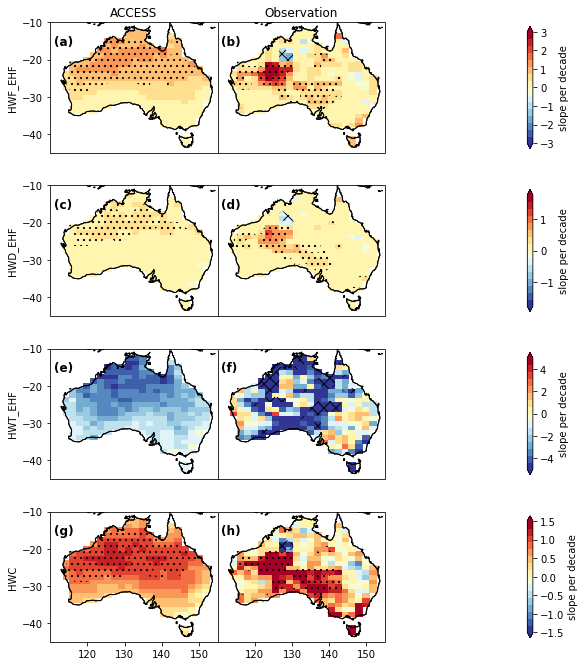

In [64]:
#for thesis 

from string import ascii_lowercase
HWX_list =["HWF_EHF","HWD_EHF","HWT_EHF"]
iii=['','','']
xxx_1=[3,1.75,5]
nnn_1=[-3,-1.75,-5]



num=0
#Plot
fig, axs = plt.subplots( figsize=(9,12))
cmap2 = plt.cm.get_cmap("RdYlBu_r", 16)


ax={}
for i in range(12):
    ax[i] = plt.subplot(4,3,i+1,projection=ccrs.PlateCarree())
    ax[i].axis('on')

for (h,xxx,nnn,iiii) in zip (HWX_list,xxx_1,nnn_1,iii):

    d_filenames = []
    d_filenames = sorted(glob.glob("/g/data/w97/sl7808/ALLOUTPUT/EHF_year_ACCESS/by_ensemble/ehf_year_exp*.nc"))   
    f=[]
    for d in d_filenames:   
        a = xr.open_dataset(d, decode_times=False)
        a1 = a[h]
        a2=a1.where(a1>0).isel(time=slice(60,163)).where(land_sea>60)
        f.insert(-1,a2)
    ACCESS=xr.concat(f, 'ensemble')


    HWX_obs = xr.open_dataset("/g/data/w97/sl7808/ehf_AGCD/EHF_heatwaves____yearly_summer.nc",decode_times=False)
    HWX_o_1=HWX_obs[h]
    HWX_o=HWX_o_1.where(HWX_o_1>0).isel(time=slice(0,103)).where(land_sea>60)


    #observation
    num_o=num+1
    


    mk_t=np.apply_along_axis(mk_miss_trend,0,HWX_o[...])
    mk_h=np.apply_along_axis(mk_miss_slope,0,HWX_o[...])
    mkval=xr.DataArray(mk_h,dims=["lat","lon"],coords={"lat":HWX_o.lat,"lon":HWX_o.lon})
    mkval.plot(ax=ax[num_o],cmap=cmap2,vmax=xxx,vmin=nnn, add_colorbar=False,xlim=[110,155],ylim=[-45,-10])

    mkval_2=xr.DataArray(mk_t,dims=["lat","lon"],coords={"lat":HWX_o.lat,"lon":HWX_o.lon})
    pp=mkval_2.plot.contourf(ax=ax[num_o],levels=[-1,-0.5,0.5,1],colors='none',hatches=['xx', '', '..'], add_colorbar=False,xlim=[110,155],ylim=[-45,-10])

    #obs plot
    plot_spec(ax,num_o)
    #ax[num_o].set_title(h+"_obs") 
    ax[num_o].coastlines()
    #ax[num_o].set_xticks([ 120, 130, 140, 150], crs=ccrs.PlateCarree())
    ax[num].set_yticks([-40, -30, -20, -10], crs=ccrs.PlateCarree())

    

    #ACCESS
    mkval_a=[]
    mkval_t_a=[]
    for i in range(20):
        HWX_A=ACCESS.isel(ensemble=i)
        
        # slope 
        mk_h=np.apply_along_axis(mk_miss_slope,0,HWX_A[...])
        mkval=xr.DataArray(mk_h,dims=["lat","lon"],coords={"lat":HWX_A.lat,"lon":HWX_A.lon})
        mkval_a.insert(-1,mkval)
        
        #trend 
        mk_t=np.apply_along_axis(mk_miss_trend,0,HWX_A[...])
        mkval_t=xr.DataArray(mk_t,dims=["lat","lon"],coords={"lat":HWX_A.lat,"lon":HWX_A.lon})
        mkval_t_a.insert(-1,mkval_t)

    #concat ensembles mkval
    mkval_aa=xr.concat(mkval_a, 'ensemble')
    mkval_t_aa=xr.concat(mkval_t_a, 'ensemble')
    
    #plot slope     
    p=mkval_aa.mean(dim='ensemble').plot(ax=ax[num],cmap=cmap2,vmax=xxx,vmin=nnn, add_colorbar=False,xlim=[110,155],ylim=[-45,-10])

    
    
    #more than 10 agrees the trend 
    p_mkval_t=mkval_t_aa.where(mkval_t_aa>0.9)
    sum_p_mkval_t=p_mkval_t.sum(dim='ensemble')
    sum_p_mkval_t.where(sum_p_mkval_t>10).plot.contourf(ax=ax[num],colors='none',hatches=['..'],xlim=[110,155],ylim=[-45,-10], add_colorbar=False)

    
    n_mkval_t=mkval_t_aa.where(mkval_t_aa<-0.9)
    sum_n_mkval_t=n_mkval_t.sum(dim='ensemble')
    sum_n_mkval_t.where(sum_p_mkval_t<-1).plot.contourf(ax=ax[num],colors='none',hatches=['xx'],xlim=[110,155],ylim=[-45,-10], add_colorbar=False)

    
        
    ax[num].coastlines()
    #ax[num].set_xticks([ 120, 130, 140, 150], crs=ccrs.PlateCarree())
    #ax[num].set_yticks([-40, -30, -20, -10], crs=ccrs.PlateCarree())
    plot_spec(ax,num)
    #ax[num].set_title(h+"_access") 

    
    #colourbar
    num_col=num+2
    ax[num_col].axis('off')
    ax[num].set_ylabel(iiii+h)
    fig.colorbar(p, ax=ax[num_col], orientation='vertical',extend='both',label='slope per decade', shrink=0.75, pad=0.2)
    #fig.colorbar(pp, ax=ax[num_col], orientation='vertical', shrink=0.75, pad=0.2)

    
    num=num+3

    
    

    
    
    
    
    
    
########### CUMheat



d_filenames = []
d_filenames = sorted(glob.glob("/g/data/w97/sl7808/ALLOUTPUT/Cumheat_ACCESS/*.nc"))   
f=[]
for d in d_filenames:   
    a = xr.open_dataset(d, decode_times=False)
    a1 = a.HWC
    a2=a1.where(a1>0).isel(year=slice(60,163)).where(land_sea>60)
    f.insert(-1,a2)
ACCESS=xr.concat(f, 'ensemble')





HWX_obs = xr.open_dataset('/g/data/w97/sl7808/ALLOUTPUT/EHF_obs/original/cumheat_obs.nc',decode_times=False)
HWX_o_1=HWX_obs.HWC
HWX_o=HWX_o_1.where(HWX_o_1>0).isel(year=slice(0,103)).where(land_sea>60)



#observation
num_o=num+1

xxx=1.5
nnn=-1.5

mk_t=np.apply_along_axis(mk_miss_trend,0,HWX_o[...])
mk_h=np.apply_along_axis(mk_miss_slope,0,HWX_o[...])
mkval=xr.DataArray(mk_h,dims=["lat","lon"],coords={"lat":HWX_o.lat,"lon":HWX_o.lon})
mkval.plot(ax=ax[num_o],cmap=cmap2,vmax=xxx,vmin=nnn, add_colorbar=False,xlim=[110,155],ylim=[-45,-10])

mkval_2=xr.DataArray(mk_t,dims=["lat","lon"],coords={"lat":HWX_o.lat,"lon":HWX_o.lon})
pp=mkval_2.plot.contourf(ax=ax[num_o],levels=[-1,-0.5,0.5,1],colors='none',hatches=['xx', '', '..'], add_colorbar=False,xlim=[110,155],ylim=[-45,-10])

#obs plot
plot_spec(ax,num_o)
#ax[num_o].set_title("HWC_obs") 
ax[num_o].coastlines()
ax[num_o].set_xticks([ 120, 130, 140, 150], crs=ccrs.PlateCarree())
#ax[num_o].set_yticks([-40, -30, -20, -10], crs=ccrs.PlateCarree())



#ACCESS
mkval_a=[]
mkval_t_a=[]
for i in range(20):
    HWX_A=ACCESS.isel(ensemble=i)

    # slope 
    mk_h=np.apply_along_axis(mk_miss_slope,0,HWX_A[...])
    mkval=xr.DataArray(mk_h,dims=["lat","lon"],coords={"lat":HWX_A.lat,"lon":HWX_A.lon})
    mkval_a.insert(-1,mkval)

    #trend 
    mk_t=np.apply_along_axis(mk_miss_trend,0,HWX_A[...])
    mkval_t=xr.DataArray(mk_t,dims=["lat","lon"],coords={"lat":HWX_A.lat,"lon":HWX_A.lon})
    mkval_t_a.insert(-1,mkval_t)

#concat ensembles mkval
mkval_aa=xr.concat(mkval_a, 'ensemble')
mkval_t_aa=xr.concat(mkval_t_a, 'ensemble')

#plot slope     
p=mkval_aa.mean(dim='ensemble').plot(ax=ax[num],cmap=cmap2, add_colorbar=False,xlim=[110,155],ylim=[-45,-10],vmax=xxx,vmin=nnn)



#more than 10 agrees the trend 
p_mkval_t=mkval_t_aa.where(mkval_t_aa>0.9)
sum_p_mkval_t=p_mkval_t.sum(dim='ensemble')
sum_p_mkval_t.where(sum_p_mkval_t>10).plot.contourf(ax=ax[num],colors='none',hatches=['..'],xlim=[110,155],ylim=[-45,-10], add_colorbar=False)


n_mkval_t=mkval_t_aa.where(mkval_t_aa<-0.9)
sum_n_mkval_t=n_mkval_t.sum(dim='ensemble')
sum_n_mkval_t.where(sum_p_mkval_t<-1).plot.contourf(ax=ax[num],colors='none',hatches=['xx'],xlim=[110,155],ylim=[-45,-10], add_colorbar=False)



ax[num].coastlines()
ax[num].set_xticks([ 120, 130, 140, 150], crs=ccrs.PlateCarree())
ax[num].set_yticks([-40, -30, -20, -10], crs=ccrs.PlateCarree())
plot_spec(ax,num)
ax[num].set_ylabel('HWC')
#ax[num].set_title("HWC_access") 

ax[0].set_title("ACCESS") 
ax[1].set_title("Observation") 


#colourbar
num_col=num+2
ax[num_col].axis('off')
fig.colorbar(p, ax=ax[num_col], orientation='vertical',extend='both',label='slope per decade', shrink=0.75, pad=0.2)
#fig.colorbar(pp, ax=ax[num_col], orientation='vertical', shrink=0.75, pad=0.2)


a_list=[0,3,6,9]
a=0

for aaa in a_list:
    
    
    ax[aaa].text(0.02,0.80,'(%s)' %(ascii_lowercase[a]),
            horizontalalignment='left',verticalalignment='bottom',
            transform = ax[aaa].transAxes,fontweight='bold', fontsize=12)
    aaa_2=aaa+1
    a=a+1
    ax[aaa_2].text(0.02,0.80,'(%s)' %(ascii_lowercase[a]),
            horizontalalignment='left',verticalalignment='bottom',
            transform = ax[aaa_2].transAxes,fontweight='bold', fontsize=12)
    a=a+1


fig.subplots_adjust(wspace=0, hspace=0)

#fig.suptitle("slope per decade_ensemble mean vs obs", fontsize=16)





Text(0.5, 0.98, 'slope per decade_ensemble mean vs obs')

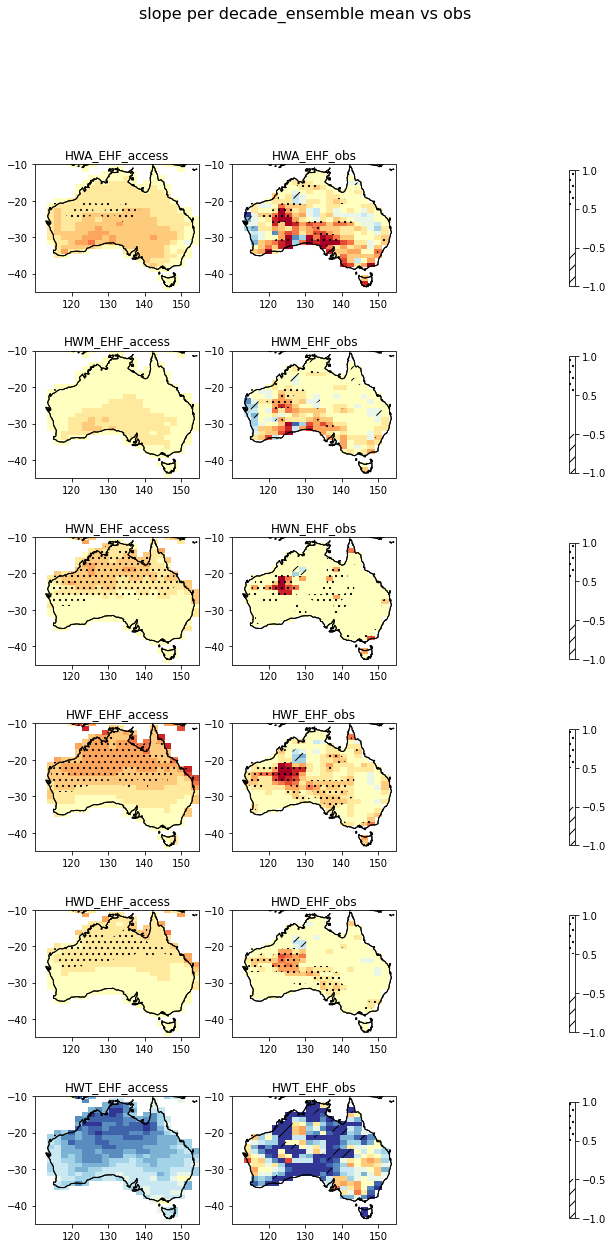

In [5]:
#from error_fixing notebook

HWX_list =["HWA_EHF","HWM_EHF","HWN_EHF","HWF_EHF","HWD_EHF","HWT_EHF"]
xxx_1=[2.5,1.5,0.5,3,1.75,5]
nnn_1=[-2.5,-1.5,-0.5,-3,-1.75,-5]



num=0
#Plot
fig, axs = plt.subplots( figsize=(10,20))
#cmap2 = plt.cm.get_cmap("Spectral_r", 15)


ax={}
for i in range(18):
    ax[i] = plt.subplot(6,3,i+1,projection=ccrs.PlateCarree())
    ax[i].axis('on')

for (h,xxx,nnn) in zip (HWX_list,xxx_1,nnn_1):

    d = ("/g/data/w97/sl7808/ALLOUTPUT/EHF_year_ACCESS/by_HWX/"+h+".nc") 
    d1=xr.open_dataset(d, decode_times=False)
    ACCESS=d1[h].isel(time=slice(60,163))


    HWX_obs = xr.open_dataset("/g/data/w97/sl7808/ehf_AGCD/EHF_heatwaves____yearly_summer.nc",decode_times=False)
    HWX_o_1=HWX_obs[h]
    HWX_o=HWX_o_1.where(HWX_o_1>0).isel(time=slice(0,103)).where(land_sea>60)


    #observation
    num_o=num+1
    


    mk_t=np.apply_along_axis(mk_miss_trend,0,HWX_o[...])
    mk_h=np.apply_along_axis(mk_miss_slope,0,HWX_o[...])
    mkval=xr.DataArray(mk_h,dims=["lat","lon"],coords={"lat":HWX_o.lat,"lon":HWX_o.lon})
    mkval.plot(ax=ax[num_o],cmap=cmap2,vmax=xxx,vmin=nnn, add_colorbar=False,xlim=[110,155],ylim=[-45,-10])

    mkval_2=xr.DataArray(mk_t,dims=["lat","lon"],coords={"lat":HWX_o.lat,"lon":HWX_o.lon})
    pp=mkval_2.plot.contourf(ax=ax[num_o],levels=[-1,-0.5,0.5,1],colors='none',hatches=['xx', '', '..'], add_colorbar=False,xlim=[110,155],ylim=[-45,-10])

    #obs plot
    plot_spec(ax,num_o)
    ax[num_o].set_title(h+"_obs") 
    ax[num_o].coastlines()
    ax[num_o].set_xticks([ 120, 130, 140, 150], crs=ccrs.PlateCarree())
    ax[num_o].set_yticks([-40, -30, -20, -10], crs=ccrs.PlateCarree())

    

    #ACCESS
    mkval_a=[]
    mkval_t_a=[]
    for i in range(20):
        HWX_A=ACCESS.isel(ensemble=i)
        
        # slope 
        mk_h=np.apply_along_axis(mk_miss_slope,0,HWX_A[...])
        mkval=xr.DataArray(mk_h,dims=["lat","lon"],coords={"lat":HWX_A.lat,"lon":HWX_A.lon})
        mkval_a.insert(-1,mkval)
        
        #trend 
        mk_t=np.apply_along_axis(mk_miss_trend,0,HWX_A[...])
        mkval_t=xr.DataArray(mk_t,dims=["lat","lon"],coords={"lat":HWX_A.lat,"lon":HWX_A.lon})
        mkval_t_a.insert(-1,mkval_t)

    #concat ensembles mkval
    mkval_aa=xr.concat(mkval_a, 'ensemble')
    mkval_t_aa=xr.concat(mkval_t_a, 'ensemble')
    
    #plot slope     
    p=mkval_aa.mean(dim='ensemble').plot(ax=ax[num],cmap=cmap2,vmax=xxx,vmin=nnn, add_colorbar=False,xlim=[110,155],ylim=[-45,-10])

    
    
    #more than 10 agrees the trend 
    p_mkval_t=mkval_t_aa.where(mkval_t_aa>0.9)
    sum_p_mkval_t=p_mkval_t.sum(dim='ensemble')
    sum_p_mkval_t.where(sum_p_mkval_t>10).plot.contourf(ax=ax[num],colors='none',hatches=['..'],xlim=[110,155],ylim=[-45,-10], add_colorbar=False)

    
    n_mkval_t=mkval_t_aa.where(mkval_t_aa<-0.9)
    sum_n_mkval_t=n_mkval_t.sum(dim='ensemble')
    sum_n_mkval_t.where(sum_p_mkval_t<-1).plot.contourf(ax=ax[num],colors='none',hatches=['xx'],xlim=[110,155],ylim=[-45,-10], add_colorbar=False)

    
        
    ax[num].coastlines()
    ax[num].set_xticks([ 120, 130, 140, 150], crs=ccrs.PlateCarree())
    ax[num].set_yticks([-40, -30, -20, -10], crs=ccrs.PlateCarree())
    plot_spec(ax,num)
    ax[num].set_title(h+"_access") 

    
    #colourbar
    num_col=num+2
    ax[num_col].axis('off')
    #fig.colorbar(p, ax=ax[num_col], orientation='vertical',extend='both',label='slope per decade', shrink=0.75, pad=0.2)
    fig.colorbar(pp, ax=ax[num_col], orientation='vertical', shrink=0.75, pad=0.2)

    
    num=num+3
    


fig.suptitle("slope per decade_ensemble mean vs obs", fontsize=16)





Text(0.5, 0.98, 'slope per decade_ensemble mean vs obs')

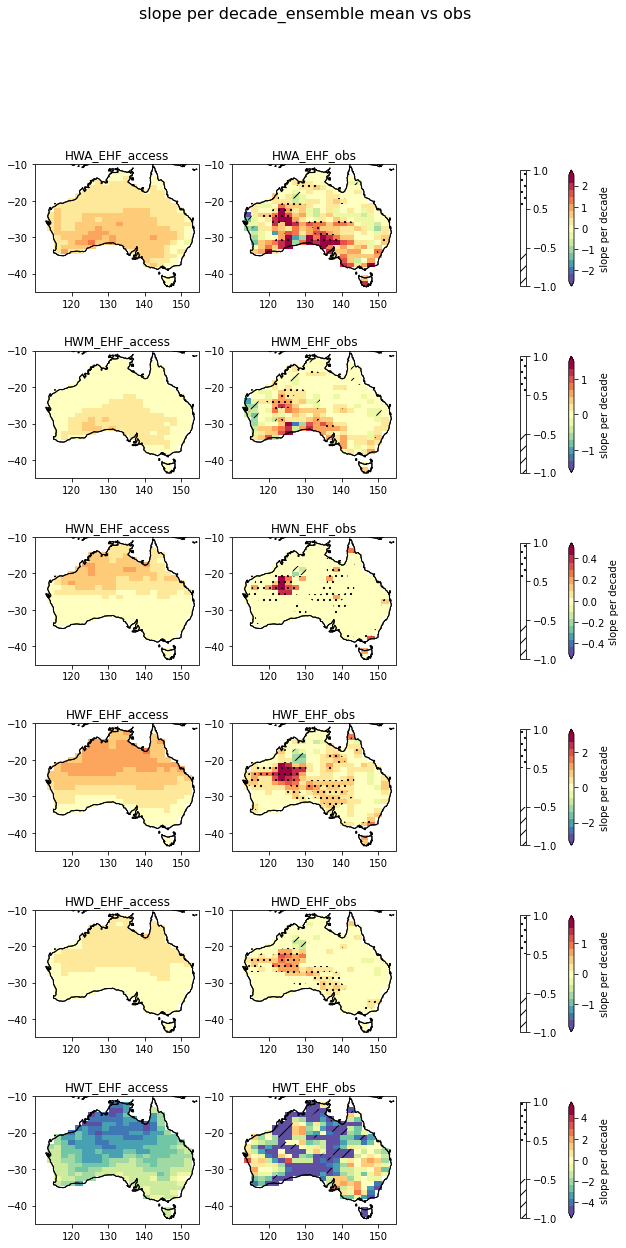

In [7]:
#older 
HWX_list =["HWA_EHF","HWM_EHF","HWN_EHF","HWF_EHF","HWD_EHF","HWT_EHF"]
xxx_1=[2.5,1.5,0.5,3,1.75,5]
nnn_1=[-2.5,-1.5,-0.5,-3,-1.75,-5]



num=0
#Plot
fig, axs = plt.subplots( figsize=(10,20))
cmap2 = plt.cm.get_cmap("Spectral_r", 15)


ax={}
for i in range(18):
    ax[i] = plt.subplot(6,3,i+1,projection=ccrs.PlateCarree())
    ax[i].axis('on')

for (h,xxx,nnn) in zip (HWX_list,xxx_1,nnn_1):

    d_filenames = []
    d_filenames = sorted(glob.glob("/g/data/w97/sl7808/ALLOUTPUT/EHF_year_ACCESS/ehf_year_exp*.nc"))   
    f=[]
    for d in d_filenames:   
        a = xr.open_dataset(d, decode_times=False)
        a1 = a[h]
        a2=a1.where(a1>0).isel(time=slice(60,163)).where(land_sea>60)
        f.insert(-1,a2)
    ACCESS=xr.concat(f, 'ensemble')


    HWX_obs = xr.open_dataset("/g/data/w97/sl7808/ehf_AGCD/EHF_heatwaves____yearly_summer.nc",decode_times=False)
    HWX_o_1=HWX_obs[h]
    HWX_o=HWX_o_1.where(HWX_o_1>0).isel(time=slice(0,103)).where(land_sea>60)


    #observation
    num_o=num+1
    


    mk_t=np.apply_along_axis(mk_miss_trend,0,HWX_o[...])
    mk_h=np.apply_along_axis(mk_miss_slope,0,HWX_o[...])
    mkval=xr.DataArray(mk_h,dims=["lat","lon"],coords={"lat":HWX_o.lat,"lon":HWX_o.lon})
    mkval.plot(ax=ax[num_o],cmap=cmap2,vmax=xxx,vmin=nnn, add_colorbar=False,xlim=[110,155],ylim=[-45,-10])

    mkval_2=xr.DataArray(mk_t,dims=["lat","lon"],coords={"lat":HWX_o.lat,"lon":HWX_o.lon})
    mkval_2.plot.contourf(ax=ax[num_o],levels=[-1,-0.5,0.5,1],colors='none',hatches=['xx', '', '..'], add_colorbar=False,xlim=[110,155],ylim=[-45,-10])

    #obs plot
    plot_spec(ax,num_o)
    ax[num_o].set_title(h+"_obs") 
    ax[num_o].coastlines()
    ax[num_o].set_xticks([ 120, 130, 140, 150], crs=ccrs.PlateCarree())
    ax[num_o].set_yticks([-40, -30, -20, -10], crs=ccrs.PlateCarree())

    

    #ACCESS
    mkval_a=[]
    for i in range(20):
        HWX_A=ACCESS.isel(ensemble=i)
        #mk_t=np.apply_along_axis(mk_miss_trend,0,HWX_A[...])
        #HWX_1=HWX_o.where(mk_t!=0)
        mk_h=np.apply_along_axis(mk_miss_slope,0,HWX_A[...])

        mkval=xr.DataArray(mk_h,dims=["lat","lon"],coords={"lat":HWX_A.lat,"lon":HWX_A.lon})
        mkval_a.insert(-1,mkval)
    mkval_aa=xr.concat(mkval_a, 'ensemble')
        
    p=mkval_aa.mean(dim='ensemble').plot(ax=ax[num],cmap=cmap2,vmax=xxx,vmin=nnn, add_colorbar=False,xlim=[110,155],ylim=[-45,-10])
    ax[num].set_title(h+"_access") 
    ax[num].coastlines()
    

    ax[num].set_xticks([ 120, 130, 140, 150], crs=ccrs.PlateCarree())
    ax[num].set_yticks([-40, -30, -20, -10], crs=ccrs.PlateCarree())
    plot_spec(ax,num)

    
    #colourbar
    num_col=num+2
    ax[num_col].axis('off')
    fig.colorbar(p, ax=ax[num_col], orientation='vertical',extend='both',label='slope per decade', shrink=0.75, pad=0.2)
    fig.colorbar(pp, ax=ax[num_col], orientation='vertical', shrink=0.75, pad=0.2)

    
    num=num+3
    

  
    #fig.colorbar(p, ax=ax[3], orientation='horizontal',extend='both',label='slope')
    #fig.colorbar(pp, ax=ax[4], orientation='horizontal',ticks=[-1,0,1],label='trend')


#for k in range (5):
#    j=k+20
#    h=k*5
#    ax[j].set_xticks([ 120, 130, 140, 150], crs=ccrs.PlateCarree())
#    ax[h].set_yticks([-40, -30, -20, -10], crs=ccrs.PlateCarree())

fig.suptitle("slope per decade_ensemble mean vs obs", fontsize=16)





# slope per decade

In [68]:
mktest("HWA_EHF",mk_miss_slope,'HWA_M-K-test_slope per decade',2.5,-2.5)

In [1]:
mktest("HWM_EHF",mk_miss_slope,'HWM_M-K-test_slope per decade',1,-1)

NameError: name 'mktest' is not defined

In [ ]:
mktest("HWN_EHF",mk_miss_slope,'HWN_M-K-test_slope per decade',0.5,-0.5)

In [ ]:
mktest("HWF_EHF",mk_miss_slope,'HWF_M-K-test_slope per decade',3,-3)

In [2]:
mktest("HWD_EHF",mk_miss_slope,'HWD_M-K-test_slope per decade',1,-1)

NameError: name 'mktest' is not defined

In [3]:
mktest("HWT_EHF",mk_miss_slope,'HWT_M-K-test_slope per decade',10,-10)

NameError: name 'mktest' is not defined

In [4]:
mktest("HWC",mk_miss_slope,'HWC_M-K-test_slope per decade',2,-2)

NameError: name 'mktest' is not defined

## s 

In [ ]:
mktest("HWA_EHF",mk_miss_s,'HWA_M-K-test_s',750,-750)

In [ ]:
mktest("HWM_EHF",mk_miss_s,'HWM_M-K-test_s',2000,-1000)

In [ ]:
mktest("HWN_EHF",mk_miss_s,'HWN_M-K-test_s',3000,-500)

In [ ]:
mktest("HWF_EHF",mk_miss_s,'HWF_M-K-test_s',2500,-500)

In [ ]:
mktest("HWD_EHF",mk_miss_s,'HWD_M-K-test_s',2000,-500)

In [ ]:
mktest("HWT_EHF",mk_miss_s,'HWT_M-K-test_s',1500,-750)

## tau

In [ ]:
mktest("HWA_EHF",mk_miss_tau,'HWA_M-K-test_tau',0.6,-0.2)

In [ ]:
mktest("HWM_EHF",mk_miss_tau,'HWM_M-K-test_tau',0.4,-0.1)

In [ ]:
mktest("HWN_EHF",mk_miss_tau,'HWN_M-K-test_tau',0.5,-0.2)

In [ ]:
mktest("HWF_EHF",mk_miss_tau,'HWF_M-K-test_tau',0.5,-0.1)

In [ ]:
mktest("HWD_EHF",mk_miss_tau,'HWD_M-K-test_tau',0.5,-0.1)

In [ ]:
mktest("HWT_EHF",mk_miss_tau,'HWT_M-K-test_tau',0.45,-0.3)

In [ ]:
HWX_list =["HWA_EHF","HWM_EHF","HWN_EHF","HWF_EHF","HWD_EHF","HWT_EHF"]

# slope

In [ ]:
mktest("HWA_EHF",mk_miss_slope,'HWA_M-K-test_tau')
mktest("HWM_EHF",mk_miss_slope,'HWM_M-K-test_tau')
mktest("HWN_EHF",mk_miss_slope,'HWN_M-K-test_tau')
mktest("HWF_EHF",mk_miss_slope,'HWF_M-K-test_tau')
mktest("HWD_EHF",mk_miss_slope,'HWD_M-K-test_tau')
mktest("HWT_EHF",mk_miss_slope,'HWT_M-K-test_tau')

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for ax in axes.flat:
    im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(im, cax=cbar_ax)

plt.show()